In [1]:
# Predicting Placement Status Using Multiple Classification Models

# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load Dataset
data = pd.read_csv("/content/train.csv")
data.drop("sl_no", axis=1, inplace=True)

print("Initial Dataset Info:\n")
print(data.info())

Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 23.6+ KB
None


status
Placed        148
Not Placed     67
Name: count, dtype: int64


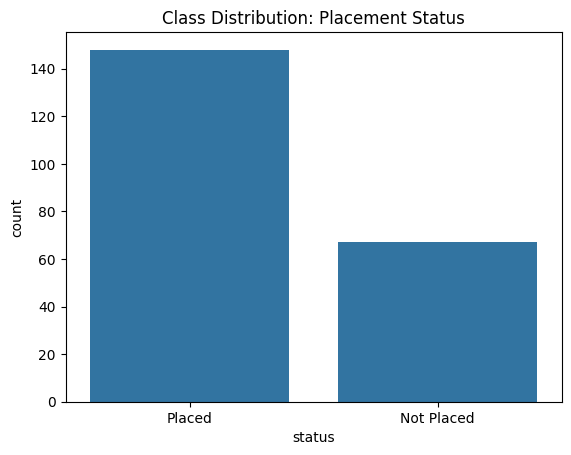

In [3]:
# 3. Exploratory Data Analysis
print(data["status"].value_counts())
sns.countplot(x='status', data=data)
plt.title("Class Distribution: Placement Status")
plt.show()

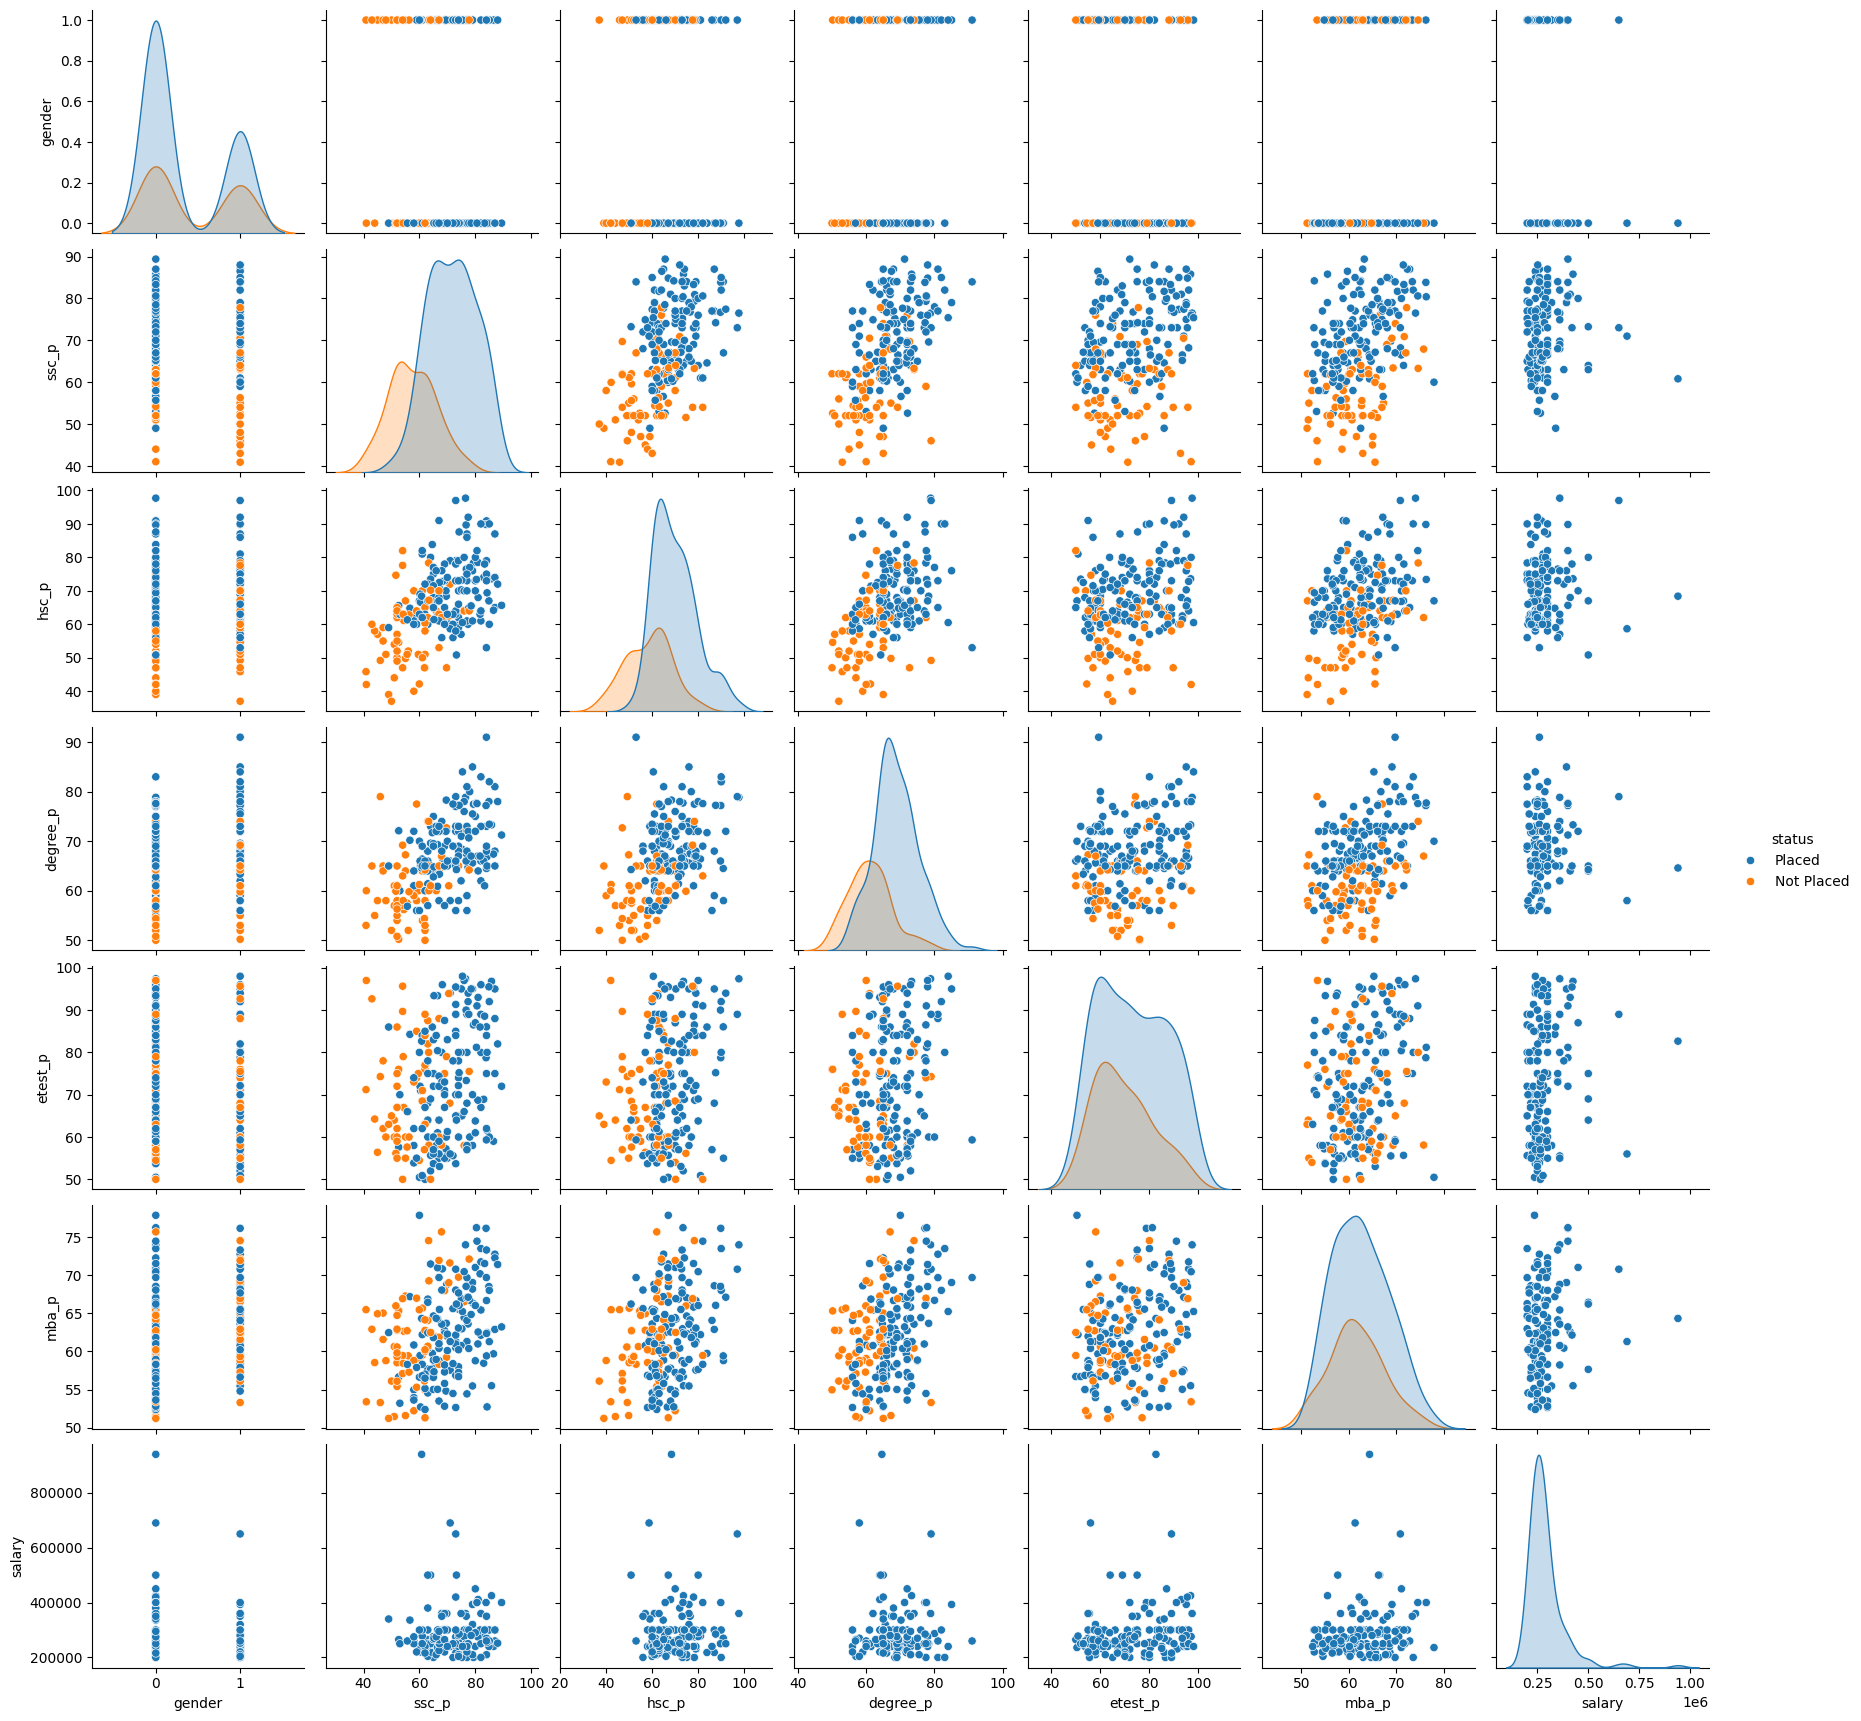

In [4]:
# Pairplot to check relationships
sns.pairplot(data, hue='status')
plt.show()

In [5]:
# 4. Check for Nulls
print(data.isnull().sum())

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [6]:
# Drop salary column
data.drop("salary", axis=1, inplace=True)
print(data.isnull().sum())


gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64


In [7]:
# 5. Encode Categorical Variables
encoder = LabelEncoder()
for column in data.select_dtypes(include="object").columns:
    data[column] = encoder.fit_transform(data[column])

In [8]:
# 6. Feature Split and Scaling
features = data.drop("status", axis=1)
target = data["status"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# 7. Evaluation Function
def evaluate_model(model_name, clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cmatrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return [accuracy, precision, recall, f1]

In [10]:
# 8. Hyperparameter Grids
params_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

params_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

In [11]:
# 9. GridSearch Function
def tune_model(clf, params):
    grid = GridSearchCV(clf, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best parameters for {clf.__class__.__name__}: {grid.best_params_}")
    return grid.best_estimator_

In [12]:
# 10. Tune Models
logreg_tuned = tune_model(LogisticRegression(max_iter=1000), params_lr)
forest_tuned = tune_model(RandomForestClassifier(random_state=42), params_rf)
svc_tuned = tune_model(SVC(probability=True), params_svc)

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best parameters for RandomForestClassifier: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



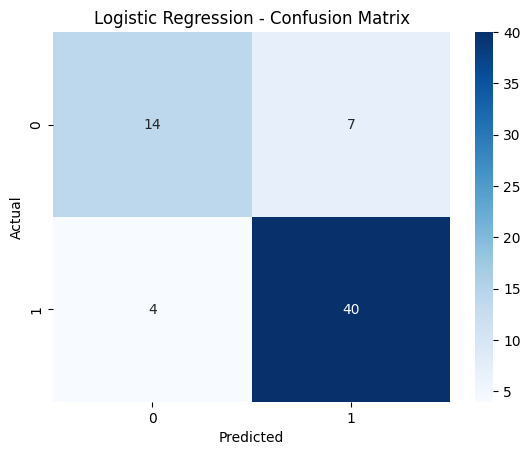


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.79      0.95      0.87        44

    accuracy                           0.80        65
   macro avg       0.81      0.72      0.74        65
weighted avg       0.81      0.80      0.78        65



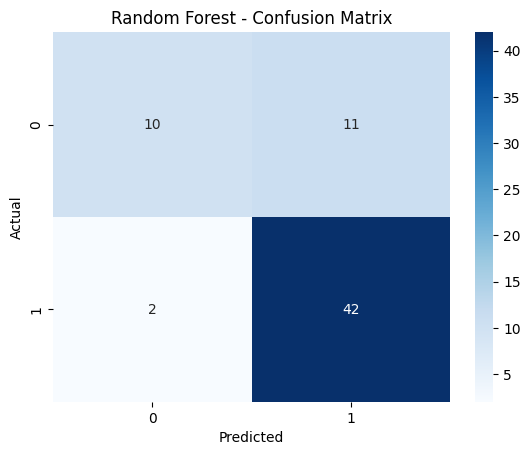


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.78      0.95      0.86        44

    accuracy                           0.78        65
   macro avg       0.80      0.69      0.71        65
weighted avg       0.79      0.78      0.76        65



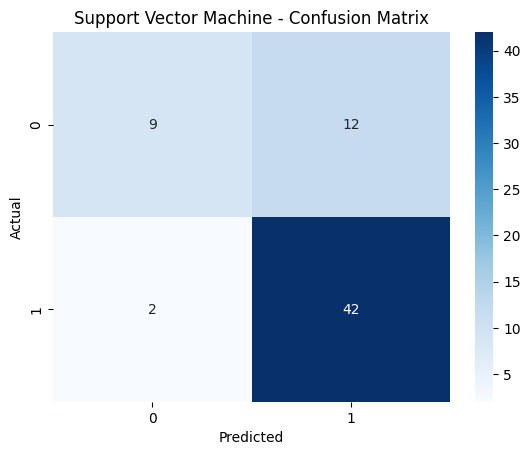

In [14]:
# 11. Evaluate Tuned Models
trained_models = {
    "Logistic Regression": logreg_tuned,
    "Random Forest": forest_tuned,
    "Support Vector Machine": svc_tuned
}

model_metrics = {}
for model_name, model_obj in trained_models.items():
    model_metrics[model_name] = evaluate_model(model_name, model_obj)



Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        21
           1       0.79      0.93      0.85        44

    accuracy                           0.78        65
   macro avg       0.78      0.70      0.72        65
weighted avg       0.78      0.78      0.77        65



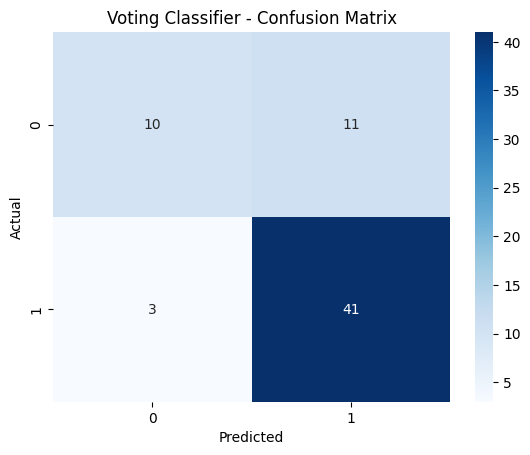

In [15]:

# 12. Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('lr', logreg_tuned),
    ('rf', forest_tuned),
    ('svc', svc_tuned)
], voting='soft')

model_metrics["Voting Classifier"] = evaluate_model("Voting Classifier", ensemble)



Tuned Model Comparison Table:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.830769   0.851064  0.909091  0.879121
Random Forest           0.800000   0.792453  0.954545  0.865979
Support Vector Machine  0.784615   0.777778  0.954545  0.857143
Voting Classifier       0.784615   0.788462  0.931818  0.854167


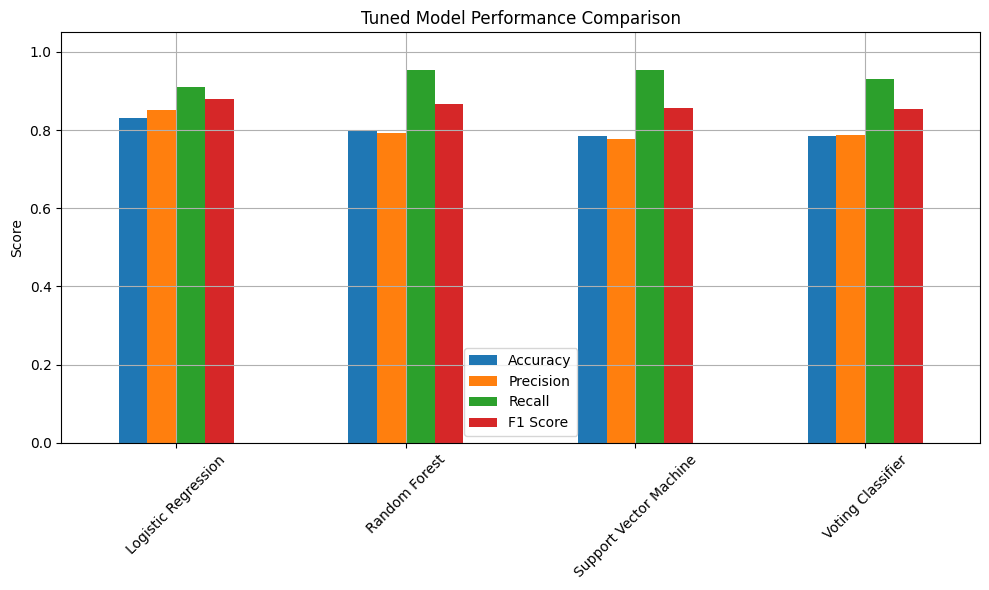

In [16]:
# 13. Compare Model Performance
metrics_summary = pd.DataFrame(model_metrics, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
print("\nTuned Model Comparison Table:")
print(metrics_summary)

metrics_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Tuned Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
